In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import scipy.stats

In [2]:
df = pd.read_csv("extractedRiau.csv")
del df["Unnamed: 0"]
df.head()

,Lintang (deg),Bujur (deg),Tanggal (dd/mm/yyy),Tingkat Kepercayaan (%),Kecamatan,Kabupaten,Provinsi
0,-0.139824,102.882179,2014-08-04,42.0,Gaunganakserka,Indragiri Hilir,Riau
1,1.983107,117.390663,2014-08-04,59.0,Gaunganakserka,Indragiri Hilir,Riau
2,1.979972,117.368645,2014-08-04,66.0,Gaunganakserka,Indragiri Hilir,Riau
3,-0.007676,102.744278,2014-08-04,25.0,Gaunganakserka,Indragiri Hilir,Riau
4,0.121050,102.805969,2014-08-04,16.0,Gaunganakserka,Indragiri Hilir,Riau


In [3]:
dfToCluster = df[["Lintang (deg)", "Bujur (deg)", "Tingkat Kepercayaan (%)"]]
dfToCluster.shape

(53789, 3)

In [9]:
kmeans = KMeans(n_clusters=3,random_state=0).fit(dfToCluster)
labels = kmeans.labels_
dfOutput = dfToCluster[["Lintang (deg)", "Bujur (deg)", "Tingkat Kepercayaan (%)"]]
dfOutput['label'] = labels
dfOutput.min_max()

AttributeError: 'DataFrame' object has no attribute 'min_max'

C:\Users\Ahmad Shohibus S\AppData\Roaming\Python\Python37\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


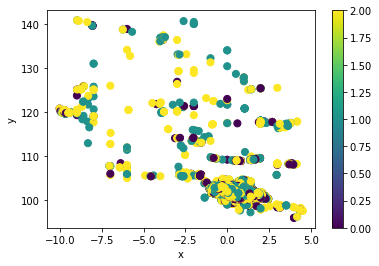

In [6]:
x = dfOutput['Lintang (deg)']
y = dfOutput['Bujur (deg)']
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=dfOutput['label'],s=50)
# for i,j in center:
#     ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)

fig.show()

In [8]:
dbi = davies_bouldin_score(dfToCluster, labels)

C:\Users\Ahmad Shohibus S\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [7]:
scaler = preprocessing.StandardScaler()
scaler.fit(dfToCluster)
df_scaled = scaler.transform(dfToCluster)

df_em = pd.DataFrame(df_scaled, columns = dfToCluster.columns)
# df_em.head()

gmm = GaussianMixture(n_components = 20)

gmm_y = gmm.fit_predict(df_em)
gmm_y = gmm_y.tolist()
dfEMoutput = df_em[["Lintang (deg)", "Bujur (deg)", "Tingkat Kepercayaan (%)"]]
dfEMoutput.insert(3,"labels", gmm_y)

dfEMoutput.head()

,Lintang (deg),Bujur (deg),Tingkat Kepercayaan (%),labels
0,-0.900997,0.435141,-1.000167,14
1,1.115476,7.638747,-0.288057,3
2,1.112498,7.627815,0.005165,3
3,-0.775476,0.366672,-1.712277,1
4,-0.653205,0.397302,-2.089276,1


C:\Users\Ahmad Shohibus S\AppData\Roaming\Python\Python37\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


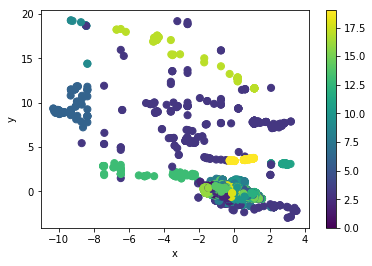

In [8]:
x = dfEMoutput['Lintang (deg)']
y = dfEMoutput['Bujur (deg)']
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=gmm_y,s=50)
# for i,j in center:
#     ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)

fig.show()

In [40]:

dfToCluster = dfToCluster.rename(columns={"Lintang (deg)" : 'latitude', "Bujur (deg)": 'longitude'})
dfToCluster.insert(3, "label", gmm_y, True)
dfToCluster.head(10)

,latitude,longitude,Tingkat Kepercayaan (%),label
0,-0.139824,102.882179,42.0,14
1,1.983107,117.390663,59.0,3
2,1.979972,117.368645,66.0,3
3,-0.007676,102.744278,25.0,1
4,0.121050,102.805969,16.0,1
5,0.882921,103.101219,43.0,10
6,0.774409,102.384315,47.0,10
7,0.562346,100.405579,69.0,2
8,0.556807,100.367622,92.0,2
9,0.546775,100.401680,50.0,2


In [62]:

dfToCluster.to_csv("outputCluster.csv")

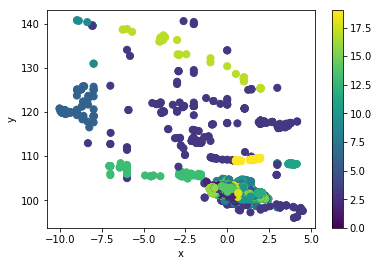

In [49]:
x = dfToCluster['latitude']
y = dfToCluster['longitude']
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=dfToCluster['label'],s=50)
# for i,j in center:
#     ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)

fig.show()

In [61]:
centers = []

for i in range(gmm.n_components):
    isClust = dfToCluster['label'] == i
    data = dfToCluster[isClust]
#     print(data.count())
    center = data['latitude'].sum()/data['latitude'].count(), data['longitude'].sum()/data['longitude'].count()
    centers.append(center)
print(centers)

dataCenter = pd.DataFrame(centers, columns=['latitude','longitude'])
dataCenter.to_csv('dataCenter.csv')

[(1.0034092721013994, 101.9654878163474), (-0.0742047887515405, 102.42433824043138), (-0.1474207522077581, 101.77758676057857), (0.0001574826675286945, 111.84708638207184), (1.7225937555781774, 101.28259763374938), (1.7229170858997254, 101.38978744867346), (-9.213112461538461, 120.9770331826923), (0.9992639909139964, 101.74048139491966), (0.32222023889058526, 102.51526494184803), (-8.306235749999999, 138.56010016666667), (1.0416523264429287, 101.80034104842679), (3.7379850123456784, 108.25289213580245), (1.7976003268833076, 101.2425765520509), (-4.0690620153712125, 106.20392984068182), (0.07814611188281675, 102.65326382061534), (1.754112801801585, 101.25392282772552), (-0.8480893776493519, 102.22839282337932), (-1.162891882352941, 131.32468552941174), (0.7890691103143318, 102.19103637311414), (1.4173403865213299, 109.21419476969149)]
